In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [4]:
data_test=pd.read_csv('SalaryData_Test.csv')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [6]:
data_train=pd.read_csv('SalaryData_Train.csv')
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


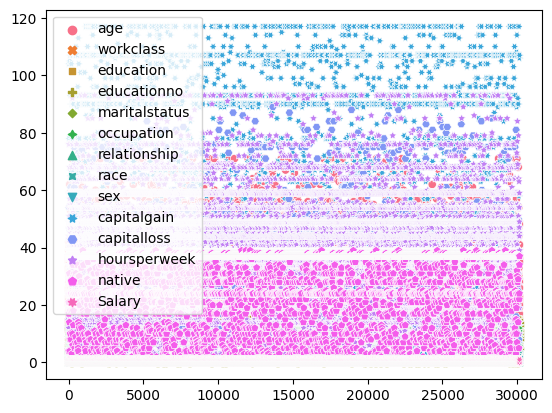

In [29]:
sns.scatterplot(data=data_train)

<Axes: xlabel='native', ylabel='Salary'>

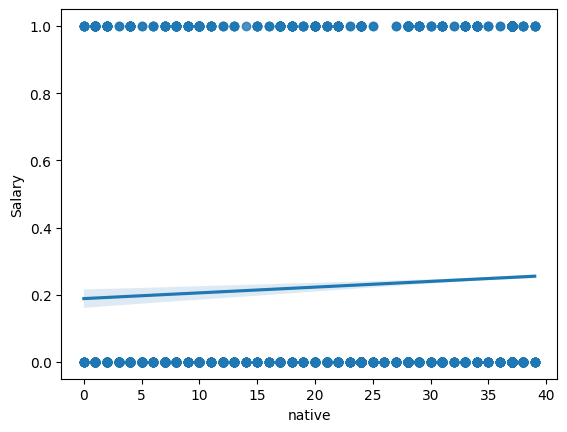

In [34]:
sns.regplot(data=data_train,x='native',y='Salary')

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


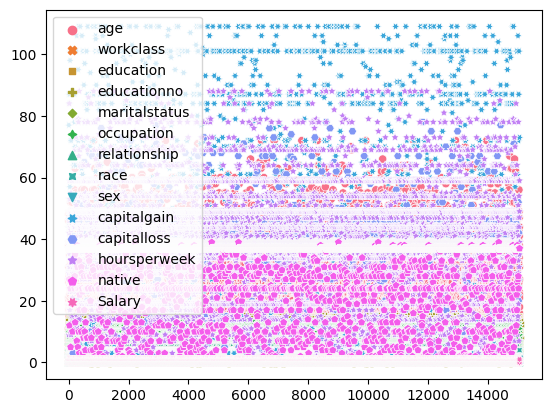

In [35]:
sns.scatterplot(data=data_test)

<Axes: xlabel='native', ylabel='hoursperweek'>

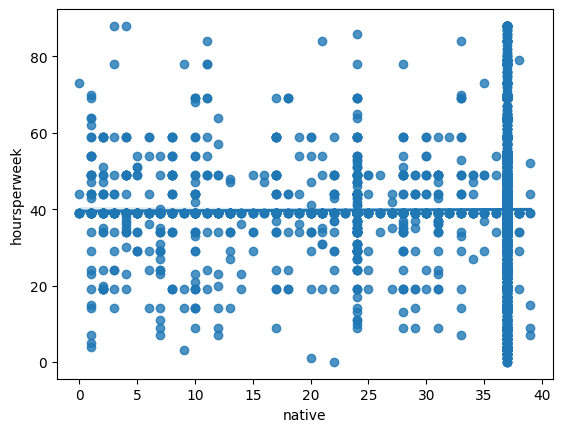

In [36]:
sns.regplot(data=data_test,x='native',y='hoursperweek')

In [9]:
le=LabelEncoder()
data_train['age']=le.fit_transform(data_train['age'])
data_train['workclass']=le.fit_transform(data_train['workclass'])
data_train['education']=le.fit_transform(data_train['education'])
data_train['educationno']=le.fit_transform(data_train['educationno'])
data_train['maritalstatus']=le.fit_transform(data_train['maritalstatus'])
data_train['occupation']=le.fit_transform(data_train['occupation'])
data_train['relationship']=le.fit_transform(data_train['relationship'])
data_train['race']=le.fit_transform(data_train['race'])
data_train['sex']=le.fit_transform(data_train['sex'])
data_train['capitalgain']=le.fit_transform(data_train['capitalgain'])
data_train['capitalloss']=le.fit_transform(data_train['capitalloss'])
data_train['hoursperweek']=le.fit_transform(data_train['hoursperweek'])
data_train['native']=le.fit_transform(data_train['native'])
data_train['Salary']=le.fit_transform(data_train['Salary'])
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30157,23,2,11,8,2,6,0,4,1,0,0,39,37,1
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0
30159,5,2,11,8,4,0,3,4,1,0,0,19,37,0


In [10]:
le=LabelEncoder()
data_test['age']=le.fit_transform(data_test['age'])
data_test['workclass']=le.fit_transform(data_test['workclass'])
data_test['education']=le.fit_transform(data_test['education'])
data_test['educationno']=le.fit_transform(data_test['educationno'])
data_test['maritalstatus']=le.fit_transform(data_test['maritalstatus'])
data_test['occupation']=le.fit_transform(data_test['occupation'])
data_test['relationship']=le.fit_transform(data_test['relationship'])
data_test['race']=le.fit_transform(data_test['race'])
data_test['sex']=le.fit_transform(data_test['sex'])
data_test['capitalgain']=le.fit_transform(data_test['capitalgain'])
data_test['capitalloss']=le.fit_transform(data_test['capitalloss'])
data_test['hoursperweek']=le.fit_transform(data_test['hoursperweek'])
data_test['native']=le.fit_transform(data_test['native'])
data_test['Salary']=le.fit_transform(data_test['Salary'])
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [11]:
x_train=data_train.iloc[:,:-1]
y_train=data_train.iloc[:,-1]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [13]:
MB_train=MultinomialNB()
MB_train.fit(x_train,y_train)

MultinomialNB()

In [14]:
MB_train.score(x_train,y_train)

0.7777685676392573

In [15]:
print('accuracy of MultiNominalMB :',MB_train.score(x_test,y_test))

accuracy of MultiNominalMB : 0.7851815017404277


In [16]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

In [17]:
new_prediction=MB_train.predict(x_test)
new_prediction

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
print(classification_report(y_test,new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11360
           1       0.61      0.30      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.62      0.63     15060
weighted avg       0.76      0.78      0.75     15060



In [19]:
accu_test_ds=accuracy_score(y_test,new_prediction)
accu_test_ds

0.7802124833997344

## **GuassianNB model**

In [20]:
model_Guassian=GaussianNB()
model_Guassian.fit(x_train,y_train)

GaussianNB()

In [22]:
y_pred_trainNB=model_Guassian.score(x_train,y_train)
y_pred_trainNB

0.8100547082228117

In [24]:
x_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

In [25]:
new_pred=model_Guassian.predict(x_test)
new_pred

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
y_test_NB=accuracy_score(y_test,new_pred)
y_test_NB

0.8146746347941567